           container datatype  operation  loop_num  time(us)
0  std::forward_list        i  push_back      1000       294
1  std::forward_list        i       read      1000        52
2  std::forward_list        i      erase      1000       116
           container datatype  operation  loop_num  time(us)
0  std::forward_list        i  push_back      1000       294
           container datatype operation  loop_num  time(us)
1  std::forward_list        i      read      1000        52
           container datatype operation  loop_num  time(us)
2  std::forward_list        i     erase      1000       116
            container datatype  operation  loop_num  time(us)
27  std::forward_list        i  push_back     10000       797
28  std::forward_list        i       read     10000       149
29  std::forward_list        i      erase     10000       347
            container datatype  operation  loop_num  time(us)
27  std::forward_list        i  push_back     10000       797
            container 

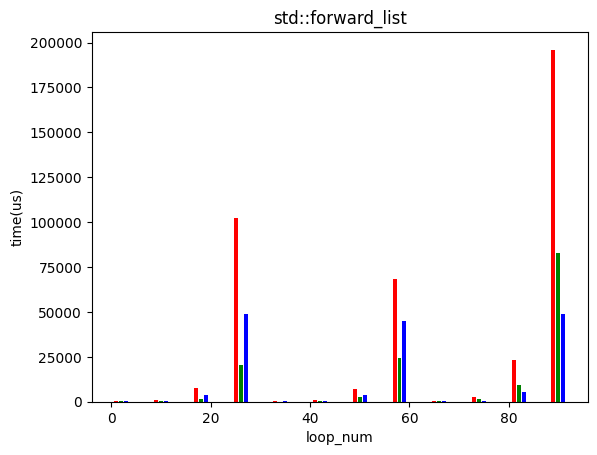

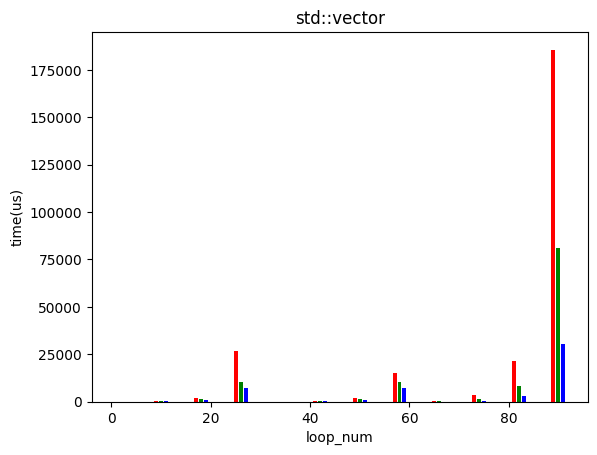

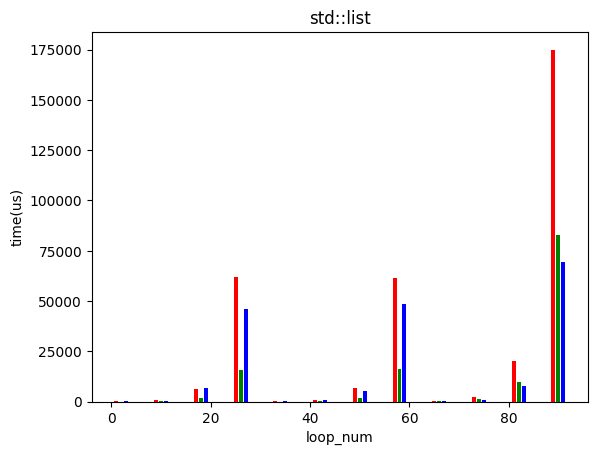

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
data = pd.read_csv('local_results.csv')

# 循环遍历每个 container，对于每个 container 都生成一个子图
for container in data['container'].unique():
    fig, ax = plt.subplots()
    ax.set_title(container)

    # 选择该 container 的数据
    container_data = data[data['container'] == container]
    # if(container == 'std::forward_list'):
        # print(container_data)

    # 循环遍历每个 datatype，对于每个 datatype 都生成一个 bar group
    position = 1
    for datatype in container_data['datatype'].unique():
        datatype_data = container_data[container_data['datatype'] == datatype]
        # if(datatype == 'i' and container == 'std::forward_list'):
            # print(datatype_data)

        # 循环遍历每个 operation，对于每个 operation 都生成一个 bar
        for loop_num in datatype_data['loop_num'].unique():
            loop_data = datatype_data[datatype_data['loop_num'] == loop_num]

            # if(datatype == 'i' and container == 'std::forward_list'):
            print(loop_data)

            for operation in loop_data['operation'].unique():

                operation_data = loop_data[loop_data['operation'] == operation]
                print(operation_data)

                if(operation_data['operation'] == 'push_back').any():
                    color = 'r'
                elif(operation_data['operation'] == 'read').any():
                    color = 'g'
                elif(operation_data['operation'] == 'erase').any():
                    color = 'b'
                

                # ax.bar(operation_data['loop_num'], operation_data['time(us)'], color=color, label=operation)
                # for operation
                ax.bar(position, operation_data['time(us)'], color=color, label=operation)
                position += 1
            position += 5

        ax.set_xlabel('loop_num')
        ax.set_ylabel('time(us)')
        # ax.legend()
        # ax.legend([operation_data['operation'], operation_data], ['Series 1', 'Series 2'], loc='upper left')
        # ax.legend((F1,F2,F3),('数学','英语','物理'))

plt.show()


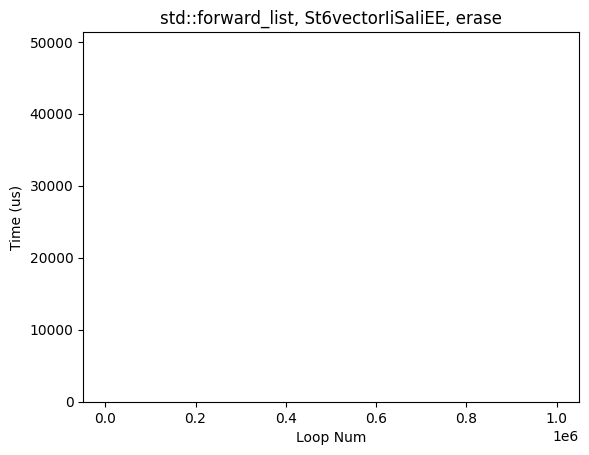

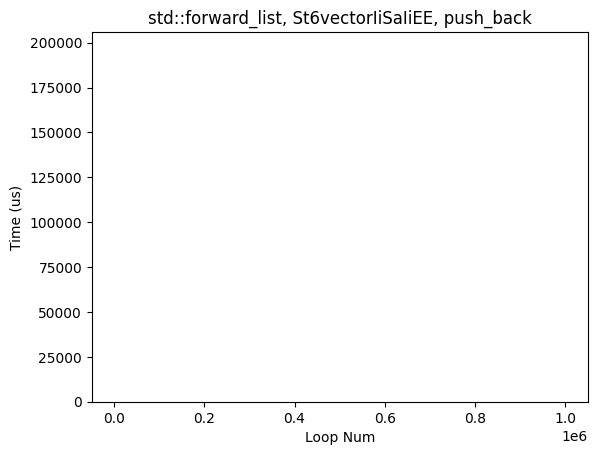

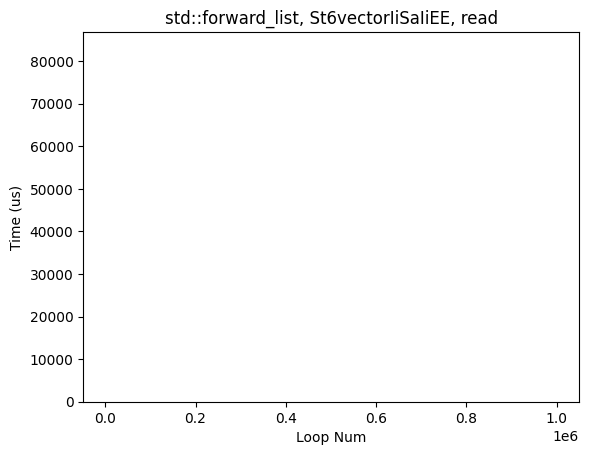

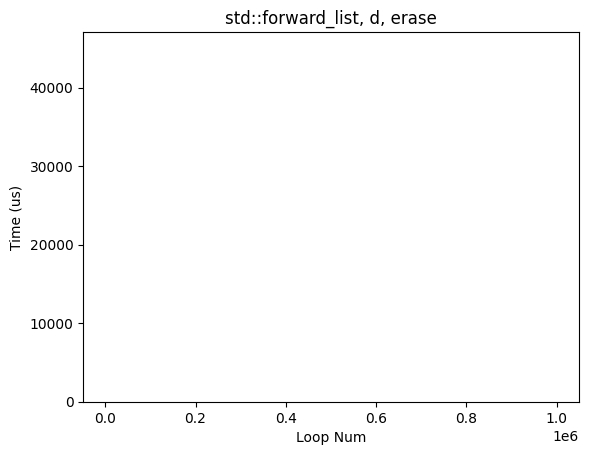

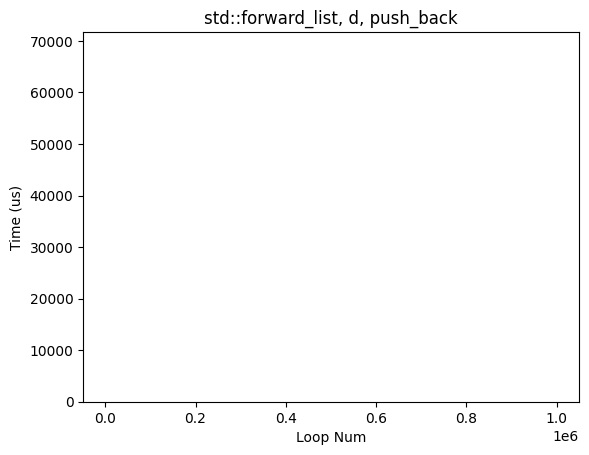

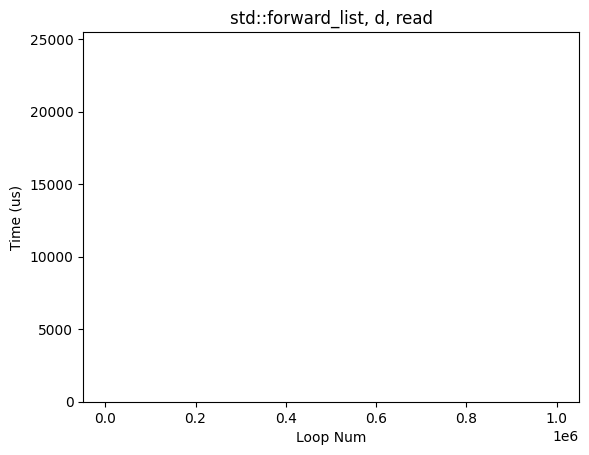

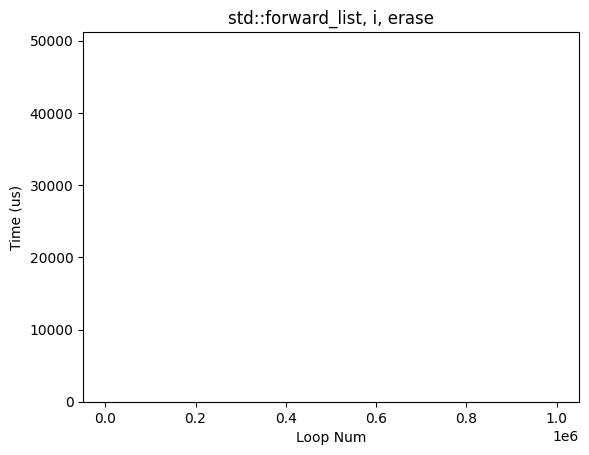

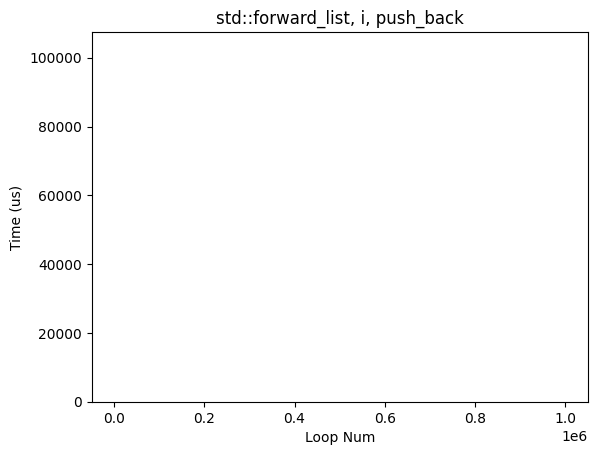

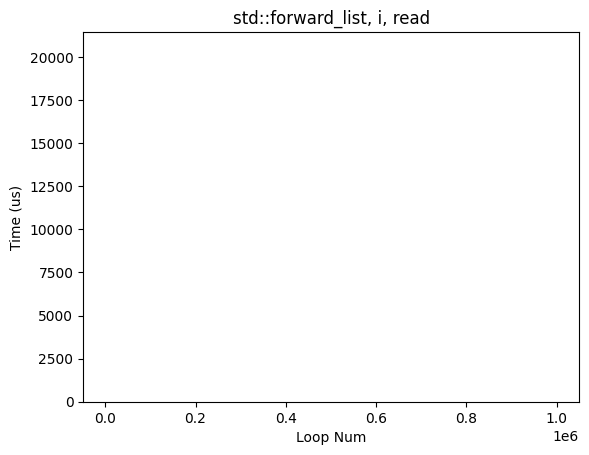

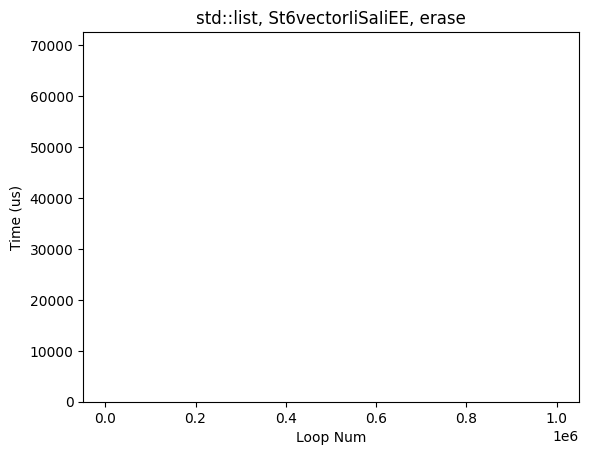

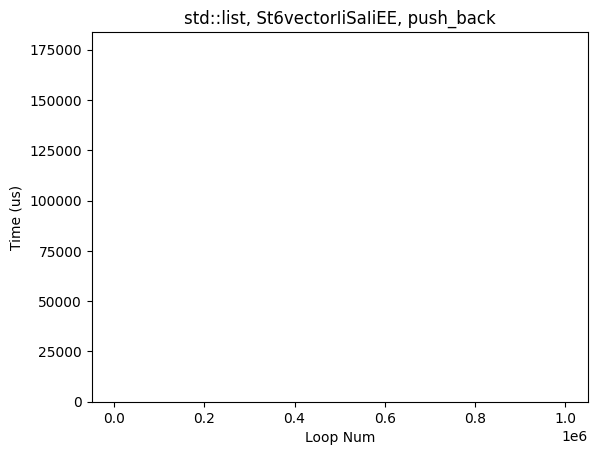

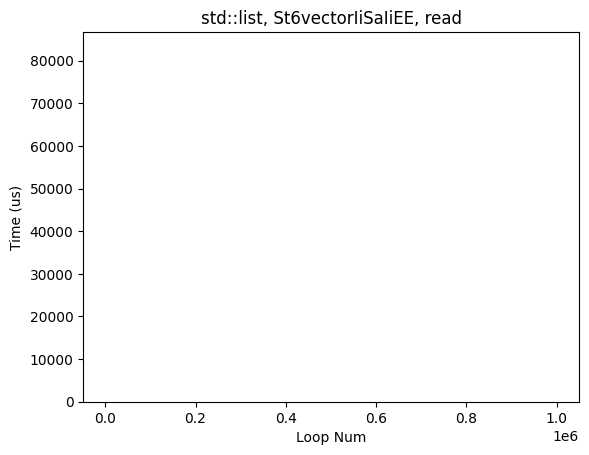

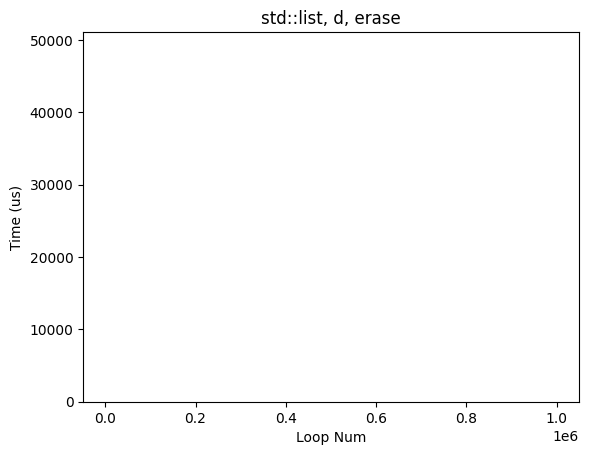

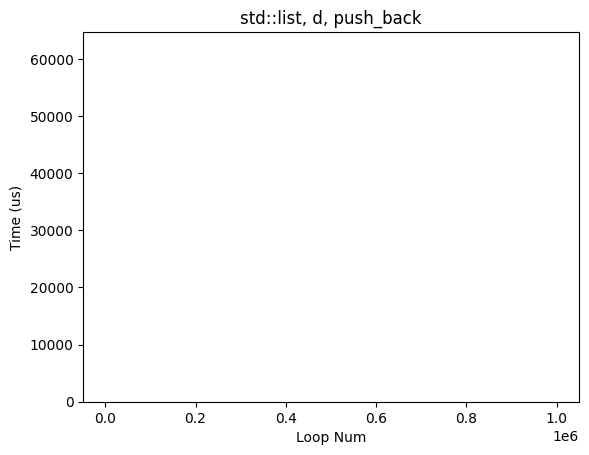

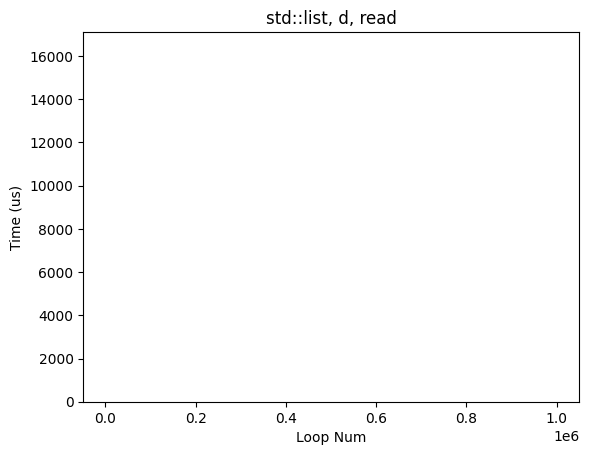

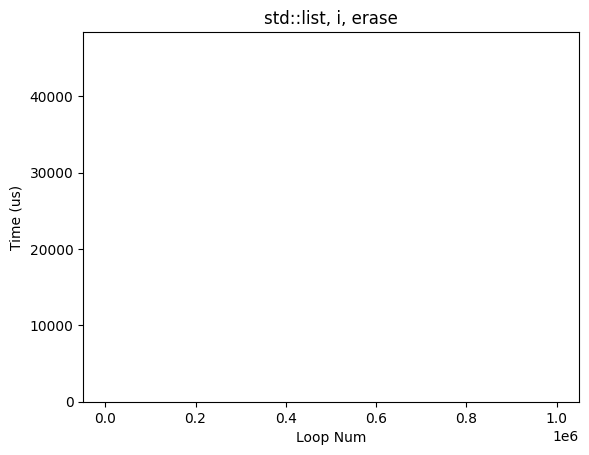

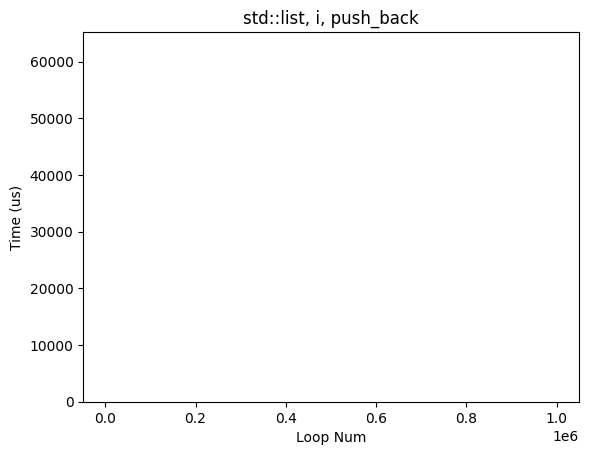

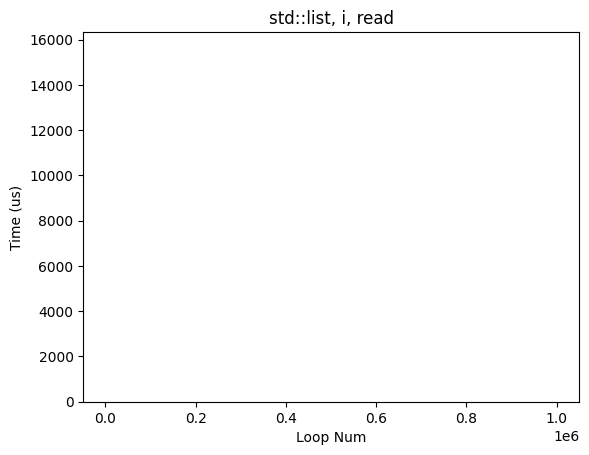

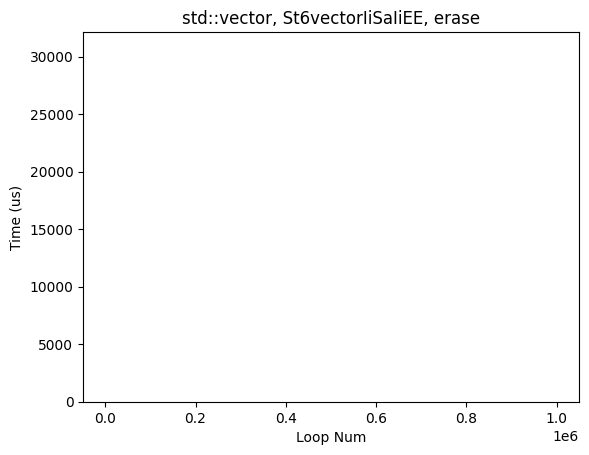

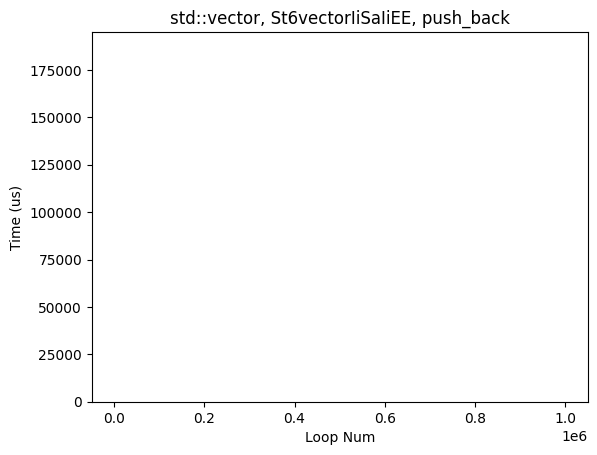

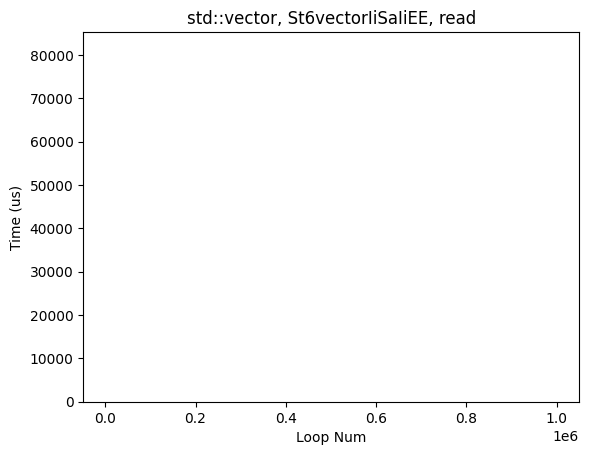

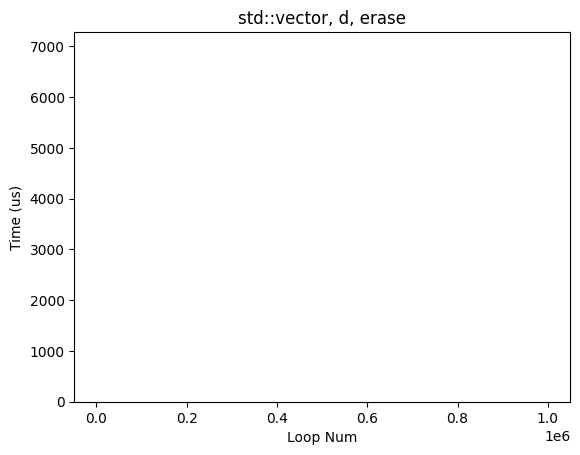

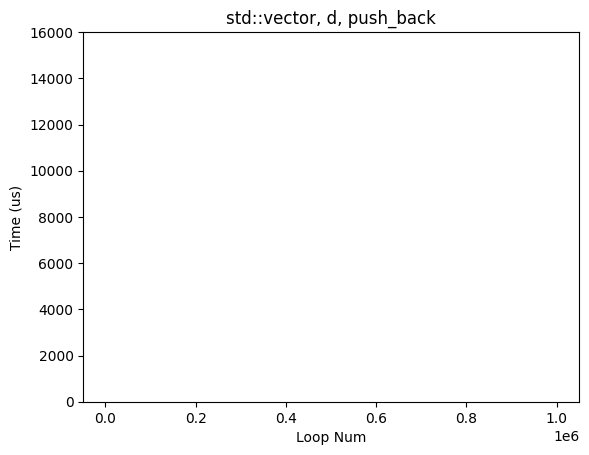

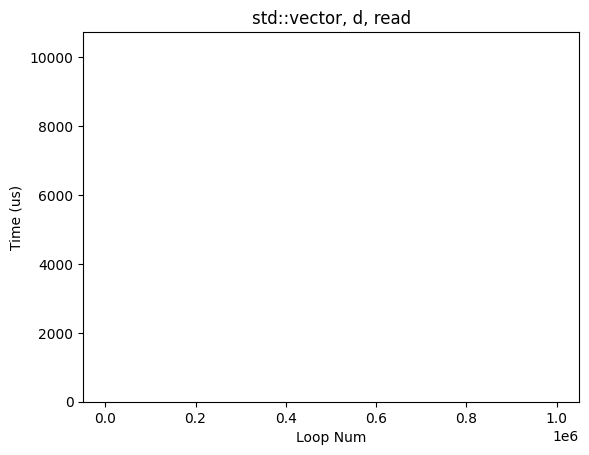

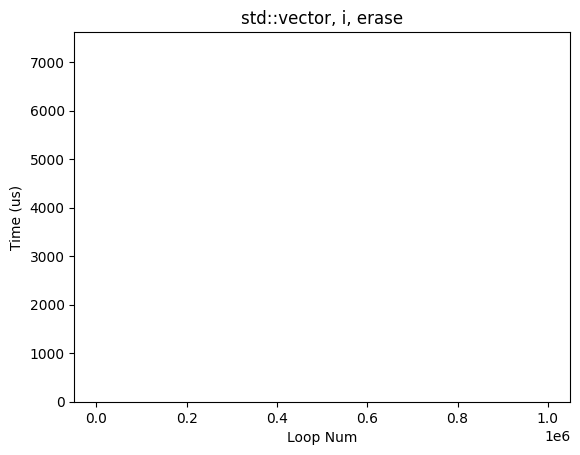

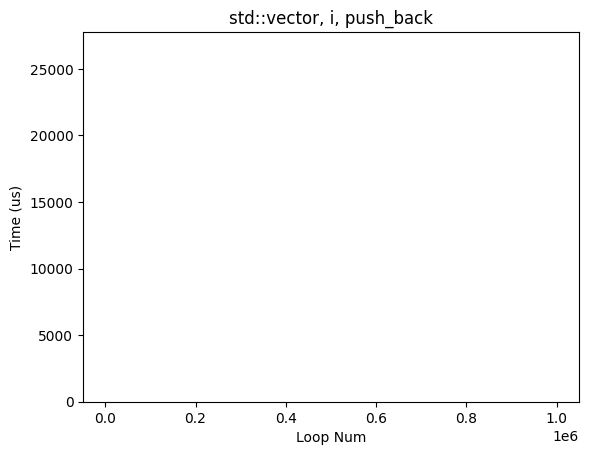

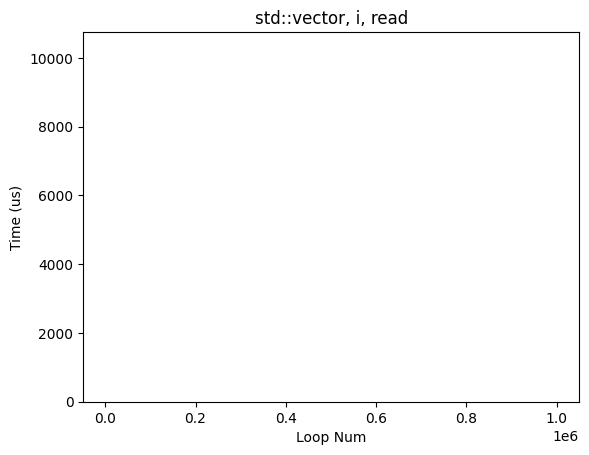

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('local_results.csv')

# Group the data by container, datatype, and operation
grouped = df.groupby(['container', 'datatype', 'operation'])

# Define the colors to use for each operation
colors = {'push_back': 'blue', 'read': 'green', 'erase': 'red'}

# Loop through each group and create a bar chart
for name, group in grouped:
    container, datatype, operation = name
    fig, ax = plt.subplots()
    ax.bar(group['loop_num'], group['time(us)'], color=colors[operation])
    ax.set_xlabel('Loop Num')
    ax.set_ylabel('Time (us)')
    ax.set_title(f'{container}, {datatype}, {operation}')
    plt.show()